In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
PROJECT_PATH = '../'
DATA_PATH = '/scratch/ceph/swei20/data/ae/dataset/test'
PCA_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/pca/spectra.h5'
NORM_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/norm/spectra.h5'
GRID_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/grid/bosz_5000_4/spectra.h5'
SZALAY_PATH = os.path.join("/scratch/ceph/szalay/swei20/AE", 'pca.h5')
sys.path.insert(0, PROJECT_PATH)

In [470]:
with h5py.File(SZALAY_PATH, 'a') as f:
    f.create_dataset('wave', data = wave, shape = (15404,))  

In [ ]:
with h5py.File(SZALAY_PATH, 'r') as f:
    wave = f['wave'][()]

In [327]:
with h5py.File(PCA_PATH, 'r') as f:
#     flux = f['flux'][()]
#     flux_idx = f['flux_idx'][()]
    Fe_H = f['Fe_H'][()]
#     log_g = f['log_g'][()]
#     O_M = f['O_M'][()]
#     C_M = f['C_M'][()]
    T_eff = f['T_eff'][()]
#     wave = f['wave'][()]
#     eigv = f['flux_eigv'][()]
#     eigs = f['flux_eigs'][()]    

In [56]:
with h5py.File(NORM_PATH, 'r') as f:
#     flux = f['flux'][:,:,:,3,1,:]
#     flux_idx = f['flux_idx'][:,:,:,3,1,:]
    Fe_H = f['Fe_H'][()]
    log_g = f['log_g'][()]
#     O_M = f['O_M'][()]
#     C_M = f['C_M'][()]
    T_eff = f['T_eff'][()]
    wave = f['wave'][()]
#     eigv = f['flux_eigv'][()]
#     eigs = f['flux_eigs'][()]  

In [58]:
log_g

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [60]:
T_eff

array([ 3500.,  3750.,  4000.,  4250.,  4500.,  4750.,  5000.,  5250.,
        5500.,  5750.,  6000.,  6250.,  6500.,  6750.,  7000.,  7250.,
        7500.,  7750.,  8000.,  8250.,  8500.,  8750.,  9000.,  9250.,
        9500.,  9750., 10000., 10250., 10500., 10750., 11000., 11250.,
       11500., 11750., 12000., 12500., 13000., 13500., 14000., 14500.,
       15000., 15500., 16000., 16500., 17000., 17500., 18000., 18500.,
       19000., 19500., 20000., 21000., 22000., 23000., 24000., 25000.,
       26000., 27000., 28000., 29000., 30000., 31000., 32000., 33000.,
       34000., 35000.])

In [57]:
Fe_H

array([-2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 ,
       -0.25,  0.  ,  0.25,  0.5 ,  0.75])

In [15]:
flux00 = flux[:,:,:,3,1,:]
idx00 = flux_idx[:,:,:,3,1]

In [19]:
flux3d = flux00[idx00]

In [6]:
flux0 = flux[flux_idx]

In [7]:
flux0.shape

(116614, 15404)

In [20]:
flux3d.shape

(6336, 15404)

In [21]:
df_para = pd.read_csv("/home/swei20/AE/data/para.csv")

In [26]:
df_para0 = df_para [(df_para["C_M"]==0.0) & (df_para["O_M"]==0)][['Fe', 'Te', 'Lg', 'FeH', 'Teff', 'Logg', 'p1',
       'p2', 'p3']]

In [27]:
df_para0.columns

Index(['Fe', 'Te', 'Lg', 'FeH', 'Teff', 'Logg', 'p1', 'p2', 'p3'], dtype='object')

In [28]:
df_para0

,Fe,Te,Lg,FeH,Teff,Logg,p1,p2,p3
9,0,0,0,-2.50,3500.0,0.0,-33.800363,2.131085,-5.416027
29,0,0,1,-2.50,3500.0,0.5,-40.023893,2.926853,-5.883087
49,0,0,2,-2.50,3500.0,1.0,-45.953753,3.805571,-7.035720
69,0,0,3,-2.50,3500.0,1.5,-45.529586,4.299167,-8.048748
85,0,0,4,-2.50,3500.0,2.0,-43.820162,4.573155,-8.223677
...,...,...,...,...,...,...,...,...,...
116526,13,60,6,0.75,30000.0,3.0,4.762276,0.634553,-1.736324
116543,13,60,7,0.75,30000.0,3.5,-2.134988,-2.545087,0.626786
116563,13,60,8,0.75,30000.0,4.0,-3.084944,-4.021800,0.970508
116583,13,60,9,0.75,30000.0,4.5,-3.481322,-4.756228,1.126319


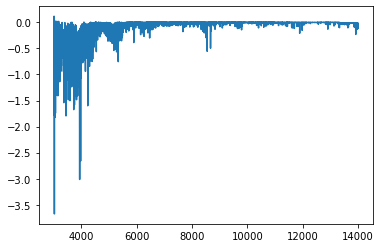

In [11]:
plt.plot(wave, flux0[0])

In [30]:
flux3d.shape

(6336, 15404)

In [134]:
start = np.digitize(4000, wave)
end = np.digitize(9838, wave)

In [135]:
wave0 = wave[start:end]
wave0.shape

(9000,)

In [136]:
flux3d0 = flux00[:,:,:,start:end]

In [137]:
flux_idx.shape

(14, 66, 11, 6, 4)

In [138]:
mask3d0 = flux_idx[:, :, :,3, 1]

In [86]:
np.sum(~mask3d0)

3828

In [69]:
df_para00=df_para0[(df_para["Teff"]<=) & (df_para["O_M"]==0)]

,Fe,Te,Lg,FeH,Teff,Logg,p1,p2,p3
9,0,0,0,-2.50,3500.0,0.0,-33.800363,2.131085,-5.416027
29,0,0,1,-2.50,3500.0,0.5,-40.023893,2.926853,-5.883087
49,0,0,2,-2.50,3500.0,1.0,-45.953753,3.805571,-7.035720
69,0,0,3,-2.50,3500.0,1.5,-45.529586,4.299167,-8.048748
85,0,0,4,-2.50,3500.0,2.0,-43.820162,4.573155,-8.223677
...,...,...,...,...,...,...,...,...,...
116526,13,60,6,0.75,30000.0,3.0,4.762276,0.634553,-1.736324
116543,13,60,7,0.75,30000.0,3.5,-2.134988,-2.545087,0.626786
116563,13,60,8,0.75,30000.0,4.0,-3.084944,-4.021800,0.970508
116583,13,60,9,0.75,30000.0,4.5,-3.481322,-4.756228,1.126319


In [139]:
HESSIAN_PATH = "/home/swei20/HL/dataset/flux3d_9k.h5"

In [78]:
wave0.shape

(12528,)

In [141]:
flux3d0.shape

(14, 66, 11, 9000)

In [140]:
wave0.shape

(9000,)

In [142]:
with h5py.File(HESSIAN_PATH, 'w') as f:
    f.create_dataset('wave', data = wave0, shape = (9000,))
    f.create_dataset('flux3d', data = flux3d0, shape = (14, 66, 11, 9000))   
    f.create_dataset('mask3d', data = mask3d0, shape = (14, 66, 11))         

In [62]:
np.where(T_eff == 10000)

(array([26]),)

In [51]:
from scipy.ndimage import laplace

In [162]:
out = laplace(flux3d0, mode='constant')

In [163]:
out.shape

(14, 66, 11, 9000)

In [166]:
out[np.isnan(out)] = 0

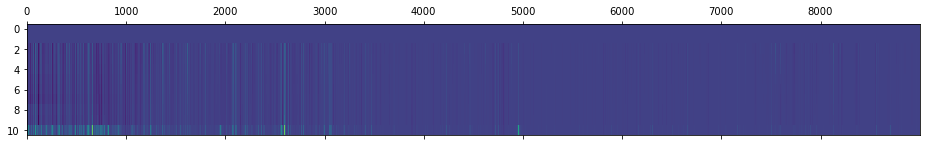

In [167]:
plt.matshow(out[6, 10, :,:], aspect='auto')

In [98]:
def get_abs_lp_frac3d(fluxH3D, mask3D):
    d = len(fluxH3D.shape)
    fluxH3D[~mask3D] = None
    if d == 3:
        fluxH3D = fluxH3D[:,None]
    u,d = fluxH3D[:-2, 1:-1,1:-1], fluxH3D[2:,1:-1,1:-1]
    h = fluxH3D[1:-1,1:-1, 1:-1]
    s,c = fluxH3D[1:-1,:-2, 1:-1], fluxH3D[1:-1,2:, 1:-1]
    t,b = fluxH3D[1:-1,:-2, :-2], fluxH3D[1:-1,2:, 2:]
    laplace = (u+d+s+c+t+b - 6 * h)/6
    laplace = abs(np.divide(laplace, h))
    laplace[np.isnan(laplace)] = 0  
    laplace95 = np.quantile(laplace, 0.95, axis = -1)
#     print(np.shape(laplace), np.shape(laplace95))
    return laplace, laplace95

In [99]:
mask3d0.shape

(14, 66, 11)

In [100]:
l, l95 = get_abs_lp_frac3d(flux3d0, mask3d0)

<ipython-input-98-f9b0b44ffe10>:11: RuntimeWarning: divide by zero encountered in true_divide
  laplace = abs(np.divide(laplace, h))
<ipython-input-98-f9b0b44ffe10>:11: RuntimeWarning: invalid value encountered in true_divide
  laplace = abs(np.divide(laplace, h))


In [102]:
l.shape

(12, 64, 9, 12528)

In [ ]:
plt.matshow()

In [103]:
log_g

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [107]:

l95.shape

(12, 64, 9)

In [104]:
Te=5000
Lg=2
Fe=0.0

In [108]:
from matplotlib.colors import LogNorm


In [148]:
def get_lp(Te,Lg,Fe,lp3d):
    pmin, pmax = np.quantile(lp3d, 0.50), np.quantile(lp3d, 0.98)

    #     fig = plt.figure(figsize=(20,8))
    fig, axs = plt.subplots(3,1, figsize = (20,10))
    idx_Te =np.where(T_eff == Te)[0][0]
    idx_Lg =np.where(log_g == Lg)[0][0]
    idx_Fe =np.where(Fe_H == Fe)[0][0]

    idx_Te0, idx_Lg0, idx_Fe0 = slice(None), slice(None), slice(None)
    flux_id = [(idx_Fe0, idx_Te, idx_Lg),
               (idx_Fe, idx_Te0, idx_Lg),
               (idx_Fe, idx_Te, idx_Lg0)]

    for ii, ax in enumerate(axs):
        ax.matshow(lp3d[flux_id[ii]], norm = LogNorm(), aspect="auto", cmap="jet",vmin =pmin,vmax =pmax)

In [155]:
mask3d0.shape

(14, 66, 11)

In [174]:
outabs = abs(out)

In [176]:
np.quantile(outabs, 0.98)

0.30975177327860315

In [182]:
np.where(log_g == Lg)[0][0]


4

In [ ]:
idx_Te

In [184]:
mask3d0[4,:,4]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

<ipython-input-148-1687a348039d>:16: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.matshow(lp3d[flux_id[ii]], norm = LogNorm(), aspect="auto", cmap="jet",vmin =pmin,vmax =pmax)


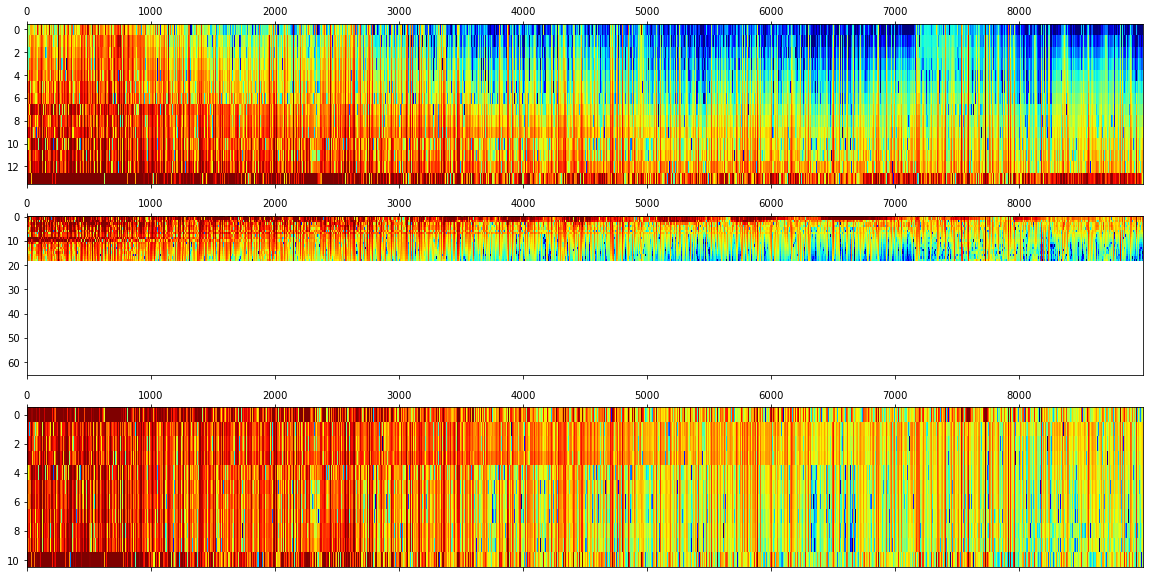

In [178]:
get_lp(Te,Lg,Fe,outabs)

<ipython-input-148-1687a348039d>:16: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.matshow(lp3d[flux_id[ii]], norm = LogNorm(), aspect="auto", cmap="jet",vmin =pmin,vmax =pmax)


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

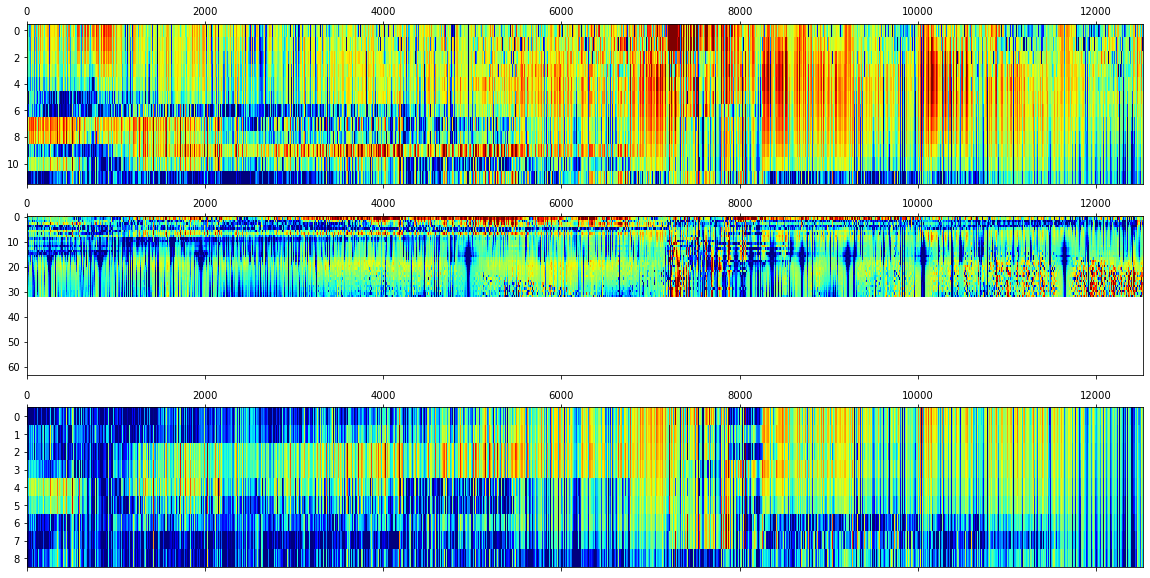

In [179]:
get_lp(Te,Lg,Fe,l)
plt.colorbar()

In [185]:
l

array([[[[2.19692364e-02, 1.74274018e-02, 2.10176164e-02, ...,
          2.40381511e+00, 8.49021276e-01, 4.39567617e-01],
         [2.80968627e-02, 2.46895829e-02, 3.56073591e-02, ...,
          2.45097427e+00, 9.50534490e-01, 5.02115108e-01],
         [2.11602933e-02, 4.66033012e-02, 7.25700630e-02, ...,
          1.38034410e+00, 6.52965763e-01, 3.55244200e-01],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[2.95972833e-02, 6.49567039e-02, 1.29309941e-01, ...,
          4.10788080e-01, 2.38788948e-01, 1.68408243e-01],
         [6.15098758e-02, 1.18710335e-01, 2.29448306e-01, ...,
          7.13871240e-01, 3.40108041e-01, 2.15995980e-01],
        

In [61]:
from hl.hotspot_util import *

NameError: name 'grid_wv' is not defined

In [ ]:
plt.matshow()

In [93]:
def get_abs_lp_frac(fluxH1D, maskH1D):
    head, mid, tail = fluxH1D[:-2,:], fluxH1D[1:-1,:], fluxH1D[2:,:]
    laplace = (head + tail - 2 * mid)/2
    fluxH1D[~maskH1D] = None
    laplace[np.isnan(laplace)] = 0
    fluxH1D[np.isnan(fluxH1D)] = 0    
    laplace_frac = np.divide(laplace, fluxH1D[1:-1,:])
    return abs(laplace_frac)

In [ ]:
fluxH1D

In [ ]:
get_abs_lp_frac(fluxH1D, maskH1D)